# Statistical Methods in Pandas - Lab

## Introduction

In this lab you'll get some hands-on experience using some of the key summary statistics methods in Pandas.

## Objectives
You will be able to:

- Calculate summary statistics for a series and DataFrame 
- Use the `.apply()` or `.applymap()` methods to apply a function to a pandas series or DataFrame  


## Getting Started

For this lab, we'll be working with a dataset containing information on various lego datasets. You will find this dataset in the file `'lego_sets.csv'`.   

In the cell below:

- Import Pandas and set the standard alias of `pd`
- Import the `'lego_sets.csv'` dataset 
- Display the first five rows of the DataFrame to get a feel for what we'll be working with

In [1]:
# Import pandas
import pandas as pd

# Import the 'lego_sets.csv' dataset
df = pd.read_csv('lego_sets.csv')

# Print the first five rows of DataFrame
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


## Getting DataFrame-Level Statistics

We'll begin by getting some overall summary statistics on the dataset. There are two ways we'll get this information -- `.info()` and `.describe()`.

The `.info()` method provides us metadata on the DataFrame itself. This allows us to answer questions such as:

* What data type does each column contain?
* How many rows are in my dataset? 
* How many total non-missing values does each column contain?
* How much memory does the DataFrame take up?

In the cell below, call our DataFrame's `.info()` method. 

In [2]:
# Call the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [3]:
df.isnull().sum()

ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_desc             377
prod_id                 0
prod_long_desc          0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
val_star_rating      1795
country                 0
dtype: int64

#### Interpreting the Results

Read the output above, and then answer the following questions:

- How many total rows are in this DataFrame?  
- How many columns contain numeric data? 
- How many contain categorical data? 
- Identify at least 3 columns that contain missing values. 

Write your answer below this line:
________________________________________________________________________________________________________________________________

# Answers
1. There are 12261 rows in this dataset.

2. There are 14 columns in the dataset.

3. There are 7 columns with numeric features as indicated by the 'float64' datatype. There are 7 columns with categorical features as indicated by the 'object' datatype.
4. num_review, play_star_rating, review_difficulty, prod_desc, star_rating, theme_name (in a few cases) and val_star_rating all clearly have null values.

Whereas `.info()` provides statistics about the DataFrame itself, `.describe()` returns output containing basic summary statistics about the data contained with the DataFrame.  

In the cell below, call the DataFrame's `.describe()` method. 

In [4]:
# Call the .describe() method
df.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


#### Interpreting the Results

The output contains descriptive statistics corresponding to the columns. Use these to answer the following questions:

- How much is the standard deviation for `piece count`? 
- How many pieces are in the largest lego set?
- How many in the smallest lego set? What is the median `val_star_rating`?

________________________________________________________________________________________________________________________________

# Answer
1. The standard deviation for piece coiunt is 825.36 (rounded to 2 places).
2. The largest lego set has 7,541 pieces.
3. The smallest lego set has a single piece.
4. The median 'val_star_rating' is 4.3. (Labelled as the 50th percentile in the summary table.)

## Getting Summary Statistics

Pandas also allows us to easily compute individual summary statistics using built-in methods.  Next, we'll get some practice using these methods. 

In the cell below, compute the median value of the `star_rating` column.

In [5]:
# Calculate the median of the star_rating column
df['star_rating'].median()

4.7

Next, get a count of the total number of unique values in `play_star_rating`.

In [6]:
# Print the number of unique values in play_star_rating
df['play_star_rating'].unique()

array([4. , 4.3, 3.6, 3.2, 3.7, 4.4, 4.1, 4.2, 3.8, 4.7, 3. , 5. , 2. ,
       nan, 4.6, 2.7, 4.5, 1. , 3.5, 3.3, 3.9, 4.8, 2.9, 3.4, 4.9, 2.5,
       2.2, 2.3, 2.8, 3.1, 2.1])

In [7]:
len(df['play_star_rating'].unique())

31

In [8]:
df['play_star_rating'].nunique(dropna = False) # nunique means number of unique values

31

In [9]:
df['play_star_rating'].nunique() 
# in the () shift + tab, you will see the documentation: 
# Return Series with number of distinct observations. Can ignore NaN values.

30

Now, compute the standard deviation of the `list_price` column.

In [10]:
# Calculate the standard deviation of the list_price column
df['list_price'].std()

91.9804293059243

If we bought every single lego set in this dataset, how many pieces would we have?  

> **Note**: If you truly want to answer this accurately, and are up for the challenge, remove duplicate lego-set entries before summing the pieces. That is, many of the lego sets are listed multiple times in the dataset above, depending on the country where it is being sold and other unique parameters. If you're stuck, just practice calculating the total number of pieces in the dataset for now.

In [11]:
df['piece_count'].sum()

6049650.0

In [12]:
df['prod_id'].value_counts()

70922.0    42
41603.0    42
10731.0    42
41601.0    42
10730.0    42
           ..
41302.0     2
41301.0     2
70313.0     2
10837.0     2
10831.0     2
Name: prod_id, Length: 744, dtype: int64

In [13]:
df[df['prod_id'] == 41302] # the same product but in US and CA

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
403,5-12,4.9900,1.0,45.0,5.0,Get puppy Lara ready for her big dog show debut!,41302.0,Groom Lara the puppy all day long with LEGO® F...,Easy,Puppy Pampering,5.0,Friends,5.0,US
2931,5-12,5.4522,1.0,45.0,5.0,Get puppy Lara ready for her big dog show debut!,41302.0,Groom Lara the puppy all day long with LEGO® F...,Easy,Puppy Pampering,5.0,Friends,5.0,CA


In [14]:
df_no_duplicates = df.drop_duplicates(subset='prod_id')

In [15]:
df_no_duplicates['prod_id'].value_counts()

41486.0    1
21144.0    1
10714.0    1
60181.0    1
75118.0    1
          ..
70364.0    1
70355.0    1
40307.0    1
70338.0    1
41600.0    1
Name: prod_id, Length: 744, dtype: int64

In [16]:
# Total number of pieces across all unique Lego sets
df.drop_duplicates(subset='prod_id')['piece_count'].sum() 

319071.0

Now, let's try getting the value for the 90% quantile for all numerical columns.  Do this in the cell below.

In [17]:
# Get the 90% quantile for all numerical columns
df.quantile(q=.9)
# q : float or array-like, default 0.5 (50% quantile)
# Value between 0 <= q <= 1, the quantile(s) to compute.

list_price            136.2971
num_reviews            38.0000
piece_count          1077.0000
play_star_rating        5.0000
prod_id             75531.0000
star_rating             5.0000
val_star_rating         5.0000
Name: 0.9, dtype: float64

## Getting Summary Statistics on Categorical Data

For obvious reasons, most of the methods we've used so far only work with numerical data -- there's no way to calculate the standard deviation of a column containing string values. However, there are some things that we can discover about columns containing categorical data. 

In the cell below, print the unique values contained within the `review_difficulty` column. 

In [18]:
# Print the unique values in the review_difficulty column
df['review_difficulty'].unique()

array(['Average', 'Easy', 'Challenging', 'Very Easy', nan,
       'Very Challenging'], dtype=object)

Now, let's get the `value_counts()` for this column, to see how common each is. 

In [19]:
# Get the value_counts() of the review_difficulty column
print(df['review_difficulty'].value_counts())

# Alternatively normalized value counts
df['review_difficulty'].value_counts(normalize=True)

Easy                4236
Average             3765
Very Easy           1139
Challenging         1058
Very Challenging       8
Name: review_difficulty, dtype: int64


Easy                0.415050
Average             0.368901
Very Easy           0.111601
Challenging         0.103665
Very Challenging    0.000784
Name: review_difficulty, dtype: float64

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<AxesSubplot:>

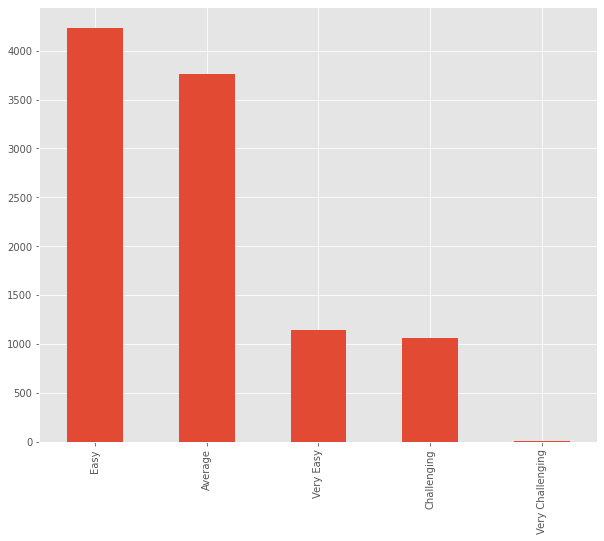

In [21]:
df['review_difficulty'].value_counts().plot(kind = 'bar', figsize = (10, 8))

As you can see, these provide us quick and easy ways to get information on columns containing categorical information.  


## Using `.applymap()`

When working with pandas DataFrames, we can quickly compute functions on the data contained by using the `.applymap()` method and passing in a lambda function. 

For instance, we can use `applymap()` to return a version of the DataFrame where every value has been converted to a string.

In the cell below:

* Call the DataFrame's `.applymap()` method and pass in `lambda x: str(x)`  
* Call the new `string_df` object's `.info()` method to confirm that everything has been cast to a string

In [22]:
# Call the .applymap() method
string_df = df.applymap(lambda x: str(x))

# Call the .info() method
string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ages               12261 non-null  object
 1   list_price         12261 non-null  object
 2   num_reviews        12261 non-null  object
 3   piece_count        12261 non-null  object
 4   play_star_rating   12261 non-null  object
 5   prod_desc          12261 non-null  object
 6   prod_id            12261 non-null  object
 7   prod_long_desc     12261 non-null  object
 8   review_difficulty  12261 non-null  object
 9   set_name           12261 non-null  object
 10  star_rating        12261 non-null  object
 11  theme_name         12261 non-null  object
 12  val_star_rating    12261 non-null  object
 13  country            12261 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


Note that everything -- even the `NaN` values, have been cast to a string in the example above. 

Note that for Pandas Series objects (such as a single column in a DataFrame), we can do the same thing using the `.apply()` method.  

This is just one example of how we can quickly compute custom functions on our DataFrame -- this will become especially useful when we learn how to **_normalize_** our datasets in a later section!

## Summary

In this lab, we learned how to:

* Use the `df.describe()` and `df.info()` summary statistics methods 
* Use built-in Pandas methods for calculating summary statistics 
* Apply a function to every element in a DataFrame